In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#read in the three datasets
#NYbestlist is the NY times best seller list
#weeks_on_list is the number of weeks a book was on the best seller list
NYbestlist_df = pd.read_csv("Resources/books_uniq_weeks.csv",encoding = 'unicode_escape')
NYbestlist_df['date'] = pd.to_datetime(NYbestlist_df['date'])
NYbestlist_df['year'] = NYbestlist_df['date'].dt.year
NYbestlist_df['month'] = NYbestlist_df['date'].dt.month
NYbestlist_df.head()


,publisher,author,primary_isbn10,primary_isbn13,date,contributor,title,weeks_on_list,year,month
0,Riverhead,Paula Hawkins,1594634025,9.78E+12,2017-02-19,by Paula Hawkins,THE GIRL ON THE TRAIN,102,2017,2
1,Scribner,Anthony Doerr,1501173219,9.78E+12,2017-05-07,by Anthony Doerr,ALL THE LIGHT WE CANNOT SEE,81,2017,5
2,Vintage,E L James,525431888,9.78E+12,2017-03-05,by E. L. James,FIFTY SHADES DARKER,66,2017,3
3,St. Martin's,Kristin Hannah,1466850604,9.78E+12,2017-10-29,by Kristin Hannah,THE NIGHTINGALE,63,2017,10
4,Penguin Group,Kathryn Stockett,1440697663,9.78E+12,2012-04-08,by Kathryn Stockett,THE HELP,58,2012,4


In [4]:
#goodreads is the Goodreads dataset
#rating of 5 
goodreads_df = pd.read_csv('Resources/books.csv',error_bad_lines=False)
goodreads_df.head()

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [5]:
#top100 is the top 100 books from 1998-2010
#Volume is how many books were sold which is a great thing to potentially track
#Nielsen records 1998-2010
top100_df = pd.read_csv('Resources/Top 100 books - TOP 100 - ALL TIME.csv')

#convert values from pounds to dollars
#remove pound sign
top100_df["Value"] = [x.strip('£') for x in top100_df["Value"]]
top100_df["RRP"] = [x.strip('£') for x in top100_df["RRP"]]
top100_df["ASP"] = [x.strip('£') for x in top100_df["ASP"]]
#convert str to float
top100_df["Value"] = [float(x.replace(',','')) for x in top100_df["Value"]]
top100_df["Value"] = pd.to_numeric(top100_df["Value"])
top100_df["RRP"] = pd.to_numeric(top100_df["RRP"])
top100_df["ASP"] = pd.to_numeric(top100_df["ASP"])
#convert to dollars
top100_df["Value"] = [x*1.22 for x in top100_df["Value"]]
top100_df["RRP"] = [x*1.22 for x in top100_df["RRP"]]
top100_df["ASP"] = [x*1.22 for x in top100_df["ASP"]]

#extract months and year
top100_df["Publ Date"] = pd.to_datetime(top100_df['Publ Date'])
top100_df['year'] = top100_df['Publ Date'].dt.year
top100_df['month'] = top100_df['Publ Date'].dt.month
top100_df.head()

,Index,Position,ISBN,Title,Author,Imprint,Publisher Group,Volume,Value,RRP,ASP,Binding,Publ Date,Product Class,year,month
0,1,1,9.780550e+12,"Da Vinci Code,The","Brown, Dan",Corgi Books,Transworld Grp,"4,522,025",2.788656e+07,9.7478,6.1610,Paperback,2004-03-01,"F2.1 Crime, Thriller & Adventure",2004,3
1,3,2,9.780750e+12,Harry Potter and the Philosopher's Stone#,"Rowling, J. K.",Bloomsbury Publishing PLC,Bloomsbury Grp,"3,844,316",2.422089e+07,8.5278,6.3684,Paperback,1997-06-26,Y2.1 Children's Fiction,1997,6
2,7,3,9.780750e+12,Harry Potter and the Chamber of Secrets#,"Rowling, J. K.",Bloomsbury Publishing PLC,Bloomsbury Grp,"3,184,492",1.979331e+07,8.5278,6.1854,Paperback,1999-04-01,Y2.1 Children's Fiction,1999,4
3,6,4,9.780550e+12,Angels and Demons#,"Brown, Dan",Corgi Books,Transworld Grp,"3,096,850",1.895554e+07,9.7478,6.1610,Paperback,2003-07-01,"F2.1 Crime, Thriller & Adventure",2003,7
4,2,5,9.780750e+12,Harry Potter and the Order of the Phoenix,"Rowling, J. K.",Bloomsbury Publishing PLC,Bloomsbury Grp,"3,043,226",4.138903e+07,20.7278,13.6030,Hardback,2003-06-21,Y2.1 Children's Fiction,2003,6


In [6]:
# authors with best ratings
# books with best ratings
# ratings/ review count
# average rating
# number of pages

goodreads_data = goodreads_df.rename(columns={"authors":"Author", "title":"Book Title", "average_rating": "Average Rating", "# num_pages": "Book Pages", "ratings_count": "Ratings Count"})


# authors with best ratings
good_reads_data = goodreads_data[["Author", "Book Title", "Average Rating", "Ratings Count", "Book Pages"]]
   
good_reads_data.sort_values(["Average Rating", "Book Title"], axis=0, 
                 ascending=False, inplace=True)
good_reads_data.head(10)

,Author,Book Title,Average Rating,Ratings Count,Book Pages
4939,Tim Bogenn,Zone of the Enders: The 2nd Runner Official St...,5.0,2,128
6788,Dennis Adler-R.L. Wilson,Winchester Shotguns,5.0,2,372
879,Julie Sylvester-David Sylvester,Willem de Kooning: Late Paintings,5.0,1,83
11069,Laura Driscoll-Alisa Klayman-Grodsky-Eric ...,Tyrannosaurus Wrecks (Stanley #1),5.0,2,24
7506,Todd Davis-Marc Frey,The New Big Book of America,5.0,2,56
11542,Keith Donohue,The Irish Anatomist: A Study of Flann O'Brien,5.0,1,222
6745,NOT A BOOK,The Goon Show Volume 5: And There's More Wher...,5.0,0,2
6596,NOT A BOOK,The Goon Show Volume 4: My Knees Have Fallen ...,5.0,3,2
6598,NOT A BOOK,The Goon Show Volume 11: He's Fallen in the W...,5.0,2,2
5786,John Diamond,The Diamond Color Meditation: Color Path to th...,5.0,5,74


In [7]:
# count total number of authors 
author_count = goodreads_df["authors"].value_counts()
author_count.count()


7600

In [8]:
# Average rating
avg_rating = good_reads_data["Average Rating"].mean()
avg_rating

3.9306198045792136

In [9]:
# Average number of pages
pages_data = good_reads_data["Book Pages"].mean()
pages_data

342.4027271401487

In [10]:
# ratings count
ratings = good_reads_data["Ratings Count"].value_counts()
ratings.head(10)

3    116
2    115
0    114
1    114
4    113
5     91
9     85
6     80
7     78
8     77
Name: Ratings Count, dtype: int64

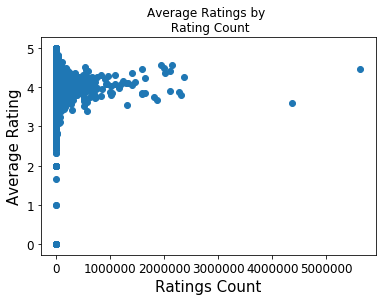

In [11]:
y = good_reads_data['Average Rating']; 
x = good_reads_data['Ratings Count']

plt.xlabel('Ratings Count', fontsize=15); plt.ylabel('Average Rating', fontsize=15)
plt.xticks(size = 12); plt.yticks(size = 12)
plt.title("Average Ratings by \n Rating Count")                                
plt.scatter(x,y)


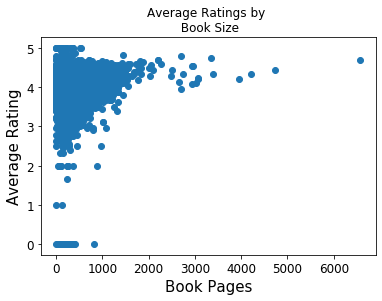

In [12]:
y = good_reads_data['Average Rating']; 
x = good_reads_data['Book Pages']

plt.xlabel('Book Pages', fontsize = 15); plt.ylabel('Average Rating', fontsize = 15)
plt.xticks(size = 12); plt.yticks(size = 12)
plt.title("Average Ratings by \n Book Size")  
plt.scatter(x,y)